# Canadian Data Science Jobs Analysis

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
    - [Data Structure Overhaul](#data-structure-overhaul)
        - [Header Style](#header-style)
        - [Formatting and Data Usage](#formatting-and-data-usage)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [What is the current salary range to expect for data science jobs in Canada?](#what-is-the-current-salary-range-to-expect-for-data-science-jobs-in-canada)
    - [Which data science job positions are available and most in-demand? What salary amount can we expect from these positions?](#which-data-science-job-positions-are-available-and-most-in-demand-what-salary-amount-can-we-expect-from-these-positions)
    - [Does work experience affect job availability? What salary amount should be expected based on work experience?](#does-work-experience-affect-job-availability-what-salary-amount-should-be-expected-based-on-work-experience)
    - [Which job board platform is the optimal platform when looking for a job?](#which-job-board-platform-is-the-optimal-platform-when-looking-for-a-job)
    - [In data science, what are the most in-demand technical skills by employers?](#in-data-science-what-are-the-most-in-demand-technical-skills-by-employers)
    - [Which Canadian cities are the most in demand for on-site office personnel? How many total jobs are offered in each city?](#which-canadian-cities-are-the-most-in-demand-for-on-site-office-personnel-how-many-total-jobs-are-offered-in-each-city)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

2024 has been a difficult year for entry-level data science jobs and for this project, I am interested in analyzing the data science field job market. For this project, I am utilizing a Kaggle-based dataset that web-scraped Indeed and Glassdoor Canadian job postings for data using Selenium and BeautifulSoup. This dataset provides multiple interesting insights into the data science job market such as in-demand technical skills, expected work experience, and salary ranges.  

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from collections import Counter
from geopy.geocoders import Nominatim

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('Raw_Dataset.csv', sep=',')
except:
    df = pd.read_csv('/datasets/Raw_Dataset.csv', sep=',')

df.head()

,Job ID,Job Title,Company Name,Language and Tools,Job Salary,City,Province,Job Link
0,job_9c7f38160c736c78,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",NaN,Remote,NaN,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,job_0da15fed6a515fe5,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",NaN,Remote,NaN,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,job_2dc0470241aa6066,Geophysicist/Data Analyst,Sander Geophysics Limited,NaN,NaN,Ottawa,ON,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,job_cbbe0e29b236d2b5,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,job_fe8ad423818b244a,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


[Back to Table of Contents](#back)

## Pre-Processing Data

### Duplicates

In [3]:
# Checking for duplicates
df.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [4]:
# Checking for null values
df.isna().sum()

Job ID                  0
Job Title               0
Company Name            0
Language and Tools    167
Job Salary            557
City                    0
Province              118
Job Link                0
dtype: int64

In [5]:
# Filling in null values
df.fillna({'Language and Tools': 'unknown',
           'Job Salary' : 'unknown',
           'Province' : 'unknown'}, inplace = True)
df.isna().sum()

Job ID                0
Job Title             0
Company Name          0
Language and Tools    0
Job Salary            0
City                  0
Province              0
Job Link              0
dtype: int64

[Back to Table of Contents](#back)

### Removing Irrelevant Data

In [6]:
# Removing columns we do not need for this analysis
df = df.drop(columns=['Job ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           1796 non-null   object
 1   Company Name        1796 non-null   object
 2   Language and Tools  1796 non-null   object
 3   Job Salary          1796 non-null   object
 4   City                1796 non-null   object
 5   Province            1796 non-null   object
 6   Job Link            1796 non-null   object
dtypes: object(7)
memory usage: 98.3+ KB


[Back to Table of Contents](#back)

### Data Structure Overhaul

In [7]:
# Getting general information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           1796 non-null   object
 1   Company Name        1796 non-null   object
 2   Language and Tools  1796 non-null   object
 3   Job Salary          1796 non-null   object
 4   City                1796 non-null   object
 5   Province            1796 non-null   object
 6   Job Link            1796 non-null   object
dtypes: object(7)
memory usage: 98.3+ KB


,Job Title,Company Name,Language and Tools,Job Salary,City,Province,Job Link
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",unknown,Remote,unknown,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",unknown,Remote,unknown,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,Geophysicist/Data Analyst,Sander Geophysics Limited,unknown,unknown,Ottawa,ON,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


#### Header Style

In [8]:
# Checking column header for snakecase format
df.columns

Index(['Job Title', 'Company Name', 'Language and Tools', 'Job Salary', 'City',
       'Province', 'Job Link'],
      dtype='object')

In [9]:
# Renaming column names to snake_case format
df = df.rename(columns={'Job Title': 'job_title',
                        'Company Name': 'employer_name',
                        'Language and Tools': 'tech_skills',
                        'Job Salary': 'salary',
                        'City': 'city',
                        'Province': 'province',
                        'Job Link': 'web_platform'})
df.columns

Index(['job_title', 'employer_name', 'tech_skills', 'salary', 'city',
       'province', 'web_platform'],
      dtype='object')

[Back to Table of Contents](#back)

#### Formatting and Data Usage

In [10]:
# Converting all elements into snakecase format
for column in df.columns:
  df[column] = df[column].str.lower()
  df[column] = df[column].str.replace(' ', '_')

df.sample(5)

,job_title,employer_name,tech_skills,salary,city,province,web_platform
223,"senior_analyst,_fraud_strategy_&_analytics",eq_bank_|_equitable_bank,"tableau,_sql,_power_bi,_python,_r",over_$100_billion_in_combined,toronto,on,https://ca.indeed.com/rc/clk?jk=6d15acf5d85bd0...
113,intermediate_data_support_analyst_(6-month_con...,agf_management_limited,"eagle,_sql,_excel,_vba,_database",#_r11028_&_nbsp_;,toronto,on,https://ca.indeed.com/rc/clk?jk=26cd394ed6829a...
879,data_architecture_&_business_intelligence_lead,phsa,"database,_c,_big_data,_sql","88,990ã¢â‚¬â€œ$127,923_a_year,_$88,990_-_$_127...",vancouver,bc,https://ca.indeed.com/rc/clk?jk=79f96957ed8032...
662,"senior_analyst,_quality_control","taro_pharmaceuticals_inc,_canada",unknown,unknown,brampton,on,https://ca.indeed.com/rc/clk?jk=935871a9ee794a...
227,"business_analyst_consultant,_savings_&_retirem...",equitable_ca,r,unknown,waterloo,on,https://ca.indeed.com/rc/clk?jk=df99ded01c1df2...


experience_level column

In [11]:
# Creating experience_level column
def exp_level(value):
    if 'senior' in value:
        return 'senior'
    
    elif 'sr' in value:
        return 'senior'
    
    elif 'lead' in value:
        return 'senior'
    
    if 'assoc' in value:
        return 'middle'
    
    if 'intermed' in value:
        return 'middle'
    
    if 'jr' in value:
        return 'middle' 
    
    elif 'junior' in value:
        return 'middle'

    elif 'entry' in value:
        return 'entry-level'
    
    elif 'intern' in value:
        return 'entry-level'
    
    elif 'student' in value:
        return 'entry-level'
    
    else:
        return 'any'

df['experience_level'] = df['job_title'].apply(exp_level)
df['experience_level'].unique()

array(['any', 'senior', 'middle', 'entry-level'], dtype=object)

job_title column

In [12]:
# Looing at unique column values
df['job_title'].unique()

array(['binance_accelerator_program_-_data_analyst_(risk)',
       'business_analyst', 'geophysicist/data_analyst',
       'business_intelligence_data_engineer',
       'business_intelligence_specialist,_ft',
       'continuous_improvement_analyst', 'it_business_process_analyst',
       'computer_programmer/analyst',
       'senior_developer,_business_intelligence',
       'opgt_mod_ã¢â‚¬â€œ_one_(1)_business_analyst_ã¢â‚¬â€œ_senior',
       'business_analyst/quality_assurance_analyst',
       'capital_&_maintenance_program_analyst', 'senior_policy_analyst',
       'business_operations_analyst_(1_year_contract)',
       'senior_business_systems_analyst',
       'research_analyst_-_translational_addiction_research_laboratory',
       'payroll_analyst', 'lead_business_analyst', 'data_analyst',
       'hr_technology_lead_and_data_analyst', 'business_data_analyst',
       '(data-driven)_marketing_analyst', 'quality_analyst',
       'technology_risk_analyst', 'technical_support_analyst_',
  

In [13]:
# Removing all nonlegible characters
df['job_title'] = df['job_title'].str.replace('[^a-zA-Z0-9_]', '')

# Creating a custom function to narrow and clean unique column values to their base title
def clean_title(value):
    if 'data_a' in value:
        return 'data_analyst'
    
    elif 'scien' in value:
        return 'data_scientist'
    
    elif 'engineer' in value:
        return 'data_engineer'
    
    elif 'business_intelligence' in value:
        return 'business_intelligence_analyst'
    
    elif 'business_system' in value:
        return 'business_systems_analyst'
    
    elif 'business_analyst' in value:
        return 'business_analyst'
    
    elif 'research' in value:
        return 'research_analyst'
    
    elif 'quality' in value:
        return 'quality_analyst'
    
    elif 'marketing' in value:
        return 'marketing_analyst'
    
    elif 'risk' in value:
        return 'risk_analyst'
    
    elif 'investment' in value:
        return 'financial_analyst'
    
    elif 'asset' in value:
        return 'financial_analyst'
    
    elif 'bank' in value:
        return 'financial_analyst'
    
    elif 'sale' in value:
        return 'financial_analyst'
    
    else:
        return 'analyst'
        
df['job_title'] = df['job_title'].apply(clean_title)
df['job_title'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_25988\3049909810.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['job_title'] = df['job_title'].str.replace('[^a-zA-Z0-9_]', '')


array(['data_analyst', 'business_analyst', 'data_engineer',
       'business_intelligence_analyst', 'analyst',
       'business_systems_analyst', 'research_analyst',
       'marketing_analyst', 'quality_analyst', 'risk_analyst',
       'financial_analyst', 'data_scientist'], dtype=object)

Creating industry column

In [14]:
# Looing at unique column values
df['employer_name'].unique()

array(['binance', 'canadian_nuclear_laboratories',
       'sander_geophysics_limited', 'maximus_services,_llc',
       'niagara_health_system', 'imp_group', 'ground_effects',
       'the_city_of_vancouver', 'ontario_health', 'softline_technology',
       'dll', 'toronto_hydro', 'insurance_council_of_bc',
       'tmx_group_limited', 'royal_bank_of_canada',
       'centre_for_addiction_and_mental_health', 'cenovus_energy',
       'toronto_transit_commission', 'city_of_barrie', 'accencis_group',
       'weyburn_credit_union', 'closing_the_gap_healthcare',
       'bmo_financial_group', 'banff_caribou_properties_ltd.', 'seequent',
       'university_of_alberta', 'mackenzie_financial_corporation',
       'cloudmd_software_&_services_inc_-_can', 'banque_laurentienne',
       'b.c._college_of_nurses_and_midwives',
       'canada_life_assurance_company', 'keewee', 'snaplii', 'cae',
       'electronic_arts', 'cnooc_international', 'appcast',
       'bridgenext,_inc', 'leonardo_drs', 'autodesk',


In [15]:
# Removing all nonlegible characters
df['employer_name'] = df['employer_name'].str.replace('[^a-zA-Z0-9_]', '')

# Creating a customer function to identify the industry type
# based on the company name 
def clean_employer_name(value):
    if 'inanc' in value:
        return 'finance'
    
    elif 'invest' in value:
        return 'finance'
    
    elif 'capital' in value:
        return 'finance'

    elif 'wealth' in value:
        return 'finance'
    
    elif 'manage' in value:
        return 'finance'
    
    elif 'credit' in value:
        return 'finance'
    
    elif 'business' in value:
        return 'finance'
    
    elif 'college' in value:
        return 'education'
    
    elif 'university' in value:
        return 'education'
    
    elif 'school' in value:
        return 'education'
    
    elif 'edu' in value:
        return 'education'
    
    elif 'trans' in value:
        return 'transportation'
    
    elif 'express' in value:
        return 'transportation'
    
    elif 'rail' in value:
        return 'transportation'

    elif 'media' in value:
        return 'media'
    
    elif 'bank' in value:
        return 'banking'
    
    elif 'city' in value:
        return 'government'
    
    elif 'public' in value:
        return 'government'
    
    elif 'police' in value:
        return 'government'
    
    elif 'govern' in value:
        return 'government'
    
    elif 'energy' in value:
        return 'energy'

    elif 'nuclear' in value:
        return 'energy'
    
    elif 'elect' in value:
        return 'energy'
    
    elif 'hydro' in value:
        return 'energy'
    
    elif 'spark' in value:
        return 'energy'
    
    elif 'insurance' in value:
        return 'insurance'
    
    elif 'health' in value:
        return 'healthcare'
    
    elif 'hospital' in value:
        return 'healthcare'
    
    elif 'medic' in value:
        return 'healthcare'
    
    elif 'pharma' in value:
        return 'healthcare'
    
    elif 'care' in value:
        return 'healthcare'
    
    elif 'farm' in value:
        return 'agriculture'
    
    elif 'metal' in value:
        return 'manufacturing'
    
    elif 'engineer' in value:
        return 'manufacturing'
    
    elif 'manufactur' in value:
        return 'manufacturing'
    
    elif 'machine' in value:
        return 'manufacturing'
    
    elif 'construction' in value:
        return 'construction'
    
    elif 'contracting' in value:
        return 'construction'
    
    elif 'tech' in value:
        return 'technology'
    
    elif 'web' in value:
        return 'technology'
    
    elif 'soft' in value:
        return 'technology'
    
    elif 'systems' in value:
        return 'technology'
    
    elif 'amazon' in value:
        return 'technology'
    
    elif 'estate' in value:
        return 'real_estate'

    elif 'properties' in value:
        return 'real_estate'
    
    elif 'property' in value:
        return 'real_estate'
    
    elif 'macdonald' in value:
        return 'real_estate'
    
    elif 'consult' in value:
        return 'consulting'
    
    elif 'communication' in value:
        return 'telecommunication'
    
    elif 'radio' in value:
        return 'telecommunication'
    
    elif 'food' in value:
        return 'retail'
    
    elif 'walmart' in value:
        return 'retail'
    
    elif 'pepsico' in value:
        return 'retail'
    
    elif 'supermarket' in value:
        return 'retail'
    
    elif 'resort' in value:
        return 'travel'
    
    elif 'travel' in value:
        return 'travel'
    
    elif 'air' in value:
        return 'aerospace'
    
    elif 'flight' in value:
        return 'aerospace'
    
    elif 'aviation' in value:
        return 'aerospace'
    
    elif 'aero' in value:
        return 'aerospace'
    
    elif 'auto' in value:
        return 'automobile'
    
    elif 'driv' in value:
        return 'automobile'
    
    elif 'service' in value:
        return 'service'
    
    else:
        return 'other'
        
df['industry'] = df['employer_name'].apply(clean_employer_name)
df['industry'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_25988\2305468272.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['employer_name'] = df['employer_name'].str.replace('[^a-zA-Z0-9_]', '')


array(['finance', 'energy', 'other', 'service', 'healthcare',
       'government', 'technology', 'insurance', 'banking',
       'transportation', 'real_estate', 'education', 'automobile',
       'aerospace', 'retail', 'consulting', 'construction',
       'manufacturing', 'media', 'agriculture', 'telecommunication',
       'travel'], dtype=object)

Creating work_location column

In [16]:
# Looing at unique column values
df['city'].unique()

array(['remote', 'ottawa', 'toronto', 'niagara', 'abbotsford', 'windsor',
       'vancouver', 'burlington', 'calgary', 'barrie', 'richmond_hill',
       'weyburn', 'mississauga', 'banff', 'edmonton',
       'greater_toronto_area', 'montrãƒâ©al', 'remote_in_beauceville',
       'london', 'remote_in_charlottetown', 'saint-laurent',
       'fredericton', 'bedford', 'remote_in_toronto', 'brampton',
       'vaughan', 'surrey', 'red_lake', 'winnipeg', 'laval', 'halifax',
       'dieppe', 'vernon', 'dorval', 'bolton', 'sherbrooke', 'victoria',
       'north_york', 'oakville', 'richmond', 'burnaby',
       'metro_vancouver_regional_district', 'berwick',
       'remote_in_moncton', 'remote_in_mount_pearl', 'remote_in_milton',
       'remote_in_boucherville', 'remote_in_woodstock',
       'remote_in_ottawa', 'remote_in_kelowna', 'remote_in_lakeside',
       'remote_in_mississauga', 'remote_in_winnipeg', 'remote_in_regina',
       'remote_in_victoria', 'remote_in_port_coquitlam',
       'remote_i

In [17]:
# Removing all nonlegible characters
df['city'] = df['city'].str.replace('[^_a-zA-Z]', '')

# Creating a customer function to identify remote jobs
# from onsite jobs based on the city column
def work_location(value):
    if 'remote' in  value:
        return 'remote'
    else:
        return 'on-site'

df['work_location'] = df['city'].apply(work_location)
df['work_location'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_25988\3066631161.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace('[^_a-zA-Z]', '')


array(['remote', 'on-site'], dtype=object)

city column

In [18]:
# Creating a customer function to clean the city
# column to find the company hq of the employer
# and also to clean spelling and format errors
def clean_city(value):
    if value.startswith('remote_in_'):
        return value[10:]
    
    if 'vancouver' in  value:
        return 'vancouver'
    
    if 'toronto' in  value:
        return 'toronto'
    
    if 'montral' in  value:
        return 'montreal'
    
    if value.startswith('_'):
        return value[1:]
    
    else:
        return value

df['city'] = df['city'].apply(clean_city)
df['city'].unique()

array(['remote', 'ottawa', 'toronto', 'niagara', 'abbotsford', 'windsor',
       'vancouver', 'burlington', 'calgary', 'barrie', 'richmond_hill',
       'weyburn', 'mississauga', 'banff', 'edmonton', 'montreal',
       'beauceville', 'london', 'charlottetown', 'saintlaurent',
       'fredericton', 'bedford', 'brampton', 'vaughan', 'surrey',
       'red_lake', 'winnipeg', 'laval', 'halifax', 'dieppe', 'vernon',
       'dorval', 'bolton', 'sherbrooke', 'victoria', 'north_york',
       'oakville', 'richmond', 'burnaby', 'berwick', 'moncton',
       'mount_pearl', 'milton', 'boucherville', 'woodstock', 'kelowna',
       'lakeside', 'regina', 'port_coquitlam', 'thunder_bay', 'squamish',
       'south_dundas', 'hamilton', 'waterloo', 'waterdown', 'saskatoon',
       'whitehorse', 'okotoks', 'thornhill', 'concord', 'sparwood',
       'yellowknife', 'markham', 'bradford', 'etobicoke', 'leduc',
       'rocky_view_county', 'st_catharines', 'lakeshore', 'st_thomas',
       'york', 'st_paul', 'lac

province column

In [19]:
# Looing at unique column values
df['province'].unique()

array(['unknown', 'on', 'bc', 'ab', 'sk', 'qc', 'pe', 'nb', 'ns', 'mb',
       'nl', 'yt', 'nt', 'nfl'], dtype=object)

salary column

In [20]:
# Looing at unique column values
df['salary'].unique()

array(['unknown', '87,875ã¢â‚¬â€œ$105,000_a_year',
       '55.39ã¢â‚¬â€œ$62.66_an_hour',
       '43.82ã¢â‚¬â€œ$51.78_an_hour,_43.82_to_$,_51.78_per_hour',
       '75,898ã¢â‚¬â€œ$113,847_a_year,_75,898_-_$,_113,847_dll_is',
       '47.62ã¢â‚¬â€œ$56.27_an_hour,_47.62_to_$,_56.27_per_hour',
       '89,606ã¢â‚¬â€œ$128,809_a_year,_$89,606_-_$_128,809_with,_128,809_with_a,_112,008_per_annum',
       '27.48ã¢â‚¬â€œ$36.65_an_hour',
       '83,192ã¢â‚¬â€œ$104,013_a_year,_1_department_:_talent,_83,192.00_-_$,_104,013.00_pay_scale',
       '95,106.71_to_$,_127,429.57_hourly_pay,_$52.26_to_$70.02_benefits_:',
       '43.50_an_hour',
       '61,181ã¢â‚¬â€œ$76,458_a_year,_61,181_to_$,_76,458_based_on',
       '74,800ã¢â‚¬â€œ$138,600_a_year,_74,800.00_-_$,_138,600.00_pay_type',
       '54,764.33ã¢â‚¬â€œ$73,940.15_a_year,_54,764.33_to_$',
       'approximately_$252_billion_in_total',
       '45,000ã¢â‚¬â€œ$50,000_a_year',
       '104,423ã¢â‚¬â€œ$109,644_a_year,_104,423_ã¢â‚¬_â€œ,_109,644_annually_,',


In [21]:
# Removing all nonlegible characters
df['salary'] = df['salary'].str.replace('[^kK0-9$.-]', '')

# Replacing 'k' and 'K' to '000' to get the numerical salary value
df['salary'] = df['salary'].str.replace('k', '000')
df['salary'] = df['salary'].str.replace('K', '000')

# Removing all non numeric values prefix and suffix values to get just
# the numeric value. Also values that end in '.00' is not needed.
df['salary'] = df['salary'].str.replace('$', '-')
df['salary'] = df['salary'].str.replace('--', '-')
df['salary'] = df['salary'].str.replace('\.00', '')
df['salary'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_25988\4123516113.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['salary'] = df['salary'].str.replace('[^kK0-9$.-]', '')
C:\Users\jason\AppData\Local\Temp\ipykernel_25988\4123516113.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salary'] = df['salary'].str.replace('$', '-')
C:\Users\jason\AppData\Local\Temp\ipykernel_25988\4123516113.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['salary'] = df['salary'].str.replace('\.00', '')


array(['000', '87875-105000', '55.39-62.66', '43.82-51.7843.82-51.78',
       '75898-11384775898-113847', '47.62-56.2747.62-56.27',
       '89606-128809-89606-128809128809112008', '27.48-36.65',
       '83192-104013183192-104013', '95106.71-127429.57-52.26-70.02',
       '43.50', '61181-7645861181-76458', '74800-13860074800-138600',
       '54764.33-73940.1554764.33-', '-252', '45000-50000',
       '104423-109644104423109644', '54500-81800-54500-81800.', '-250',
       '107600-147100-107600-147100147100', '2020', '83500-149300',
       '-271', '46', '-1.3-1.0-0.4-0.3-0.3-0.3.-59570-110630',
       '61181-7645861181-7645861181-76458', '105000', '50-5850-58',
       '76071.18-86658.4876071.18-86658.48', '11-75223.75223.96196.',
       '-100000', '69000.10-84021.082653.85-69000.10-2653.85-',
       '79500-10600079500-106000', '90000-11000090000-110000',
       '82800-103500', '51.89-61.93-51.89-61.9361.93', '38',
       '68000-85000-1500-68000-850008500068000-85000', '28.40',
       '1058

In [22]:
# Creating a custom function to remove all non numeric values prefix and suffix values
def format_sal(value):
    if str(value).startswith('-'):
        return value[1:]
    
    if str(value).endswith('-'):
        return value[:-1]

    if str(value).endswith('.'):
        return value[:-1]
    
    if str(value).endswith('..'):
        return value[:-2]
    
    else:
        return value

df['salary'] = df['salary'].apply(format_sal)
df['salary'].unique()

array(['000', '87875-105000', '55.39-62.66', '43.82-51.7843.82-51.78',
       '75898-11384775898-113847', '47.62-56.2747.62-56.27',
       '89606-128809-89606-128809128809112008', '27.48-36.65',
       '83192-104013183192-104013', '95106.71-127429.57-52.26-70.02',
       '43.50', '61181-7645861181-76458', '74800-13860074800-138600',
       '54764.33-73940.1554764.33', '252', '45000-50000',
       '104423-109644104423109644', '54500-81800-54500-81800', '250',
       '107600-147100-107600-147100147100', '2020', '83500-149300', '271',
       '46', '1.3-1.0-0.4-0.3-0.3-0.3.-59570-110630',
       '61181-7645861181-7645861181-76458', '105000', '50-5850-58',
       '76071.18-86658.4876071.18-86658.48', '11-75223.75223.96196',
       '100000', '69000.10-84021.082653.85-69000.10-2653.85',
       '79500-10600079500-106000', '90000-11000090000-110000',
       '82800-103500', '51.89-61.93-51.89-61.9361.93', '38',
       '68000-85000-1500-68000-850008500068000-85000', '28.40',
       '105800-138800

In [23]:
# Creating a custom function to fix the format issues from salary column
# and remove repeating values within each row
def repeating_sal_value(value):
    if len(str(value)) <= 1:
        return str(value)
    
    if str(value)[0:5] == str(value)[5:10]:
        return str(value)[5:]
    
    if str(value)[0:6] == str(value)[6:12]:
        return str(value)[6:]
    
    if str(value)[0:7] == str(value)[6:14]:
        return str(value)[7:]
    
    if str(value)[0:11] == str(value)[11:22]:
        return str(value)[11:]

    if str(value)[0:12] == str(value)[12:24]:
        return str(value)[12:]

    if str(value)[0:12] == str(value)[13:25]:
        return str(value)[:12]  
    
    if str(value)[0:5] == str(value)[12:17]:
        return str(value)[12:]
    
    if str(value)[0:13] == str(value)[14:26]:
        return str(value)[13:]
    
    if str(value)[0:6] == str(value)[13:19]:
        return str(value)[13:]
    
    if str(value)[0:11] == str(value)[11:22]:
        return str(value)[11:]
    
    if str(value)[0:17] == str(value)[17:34]:
        return str(value)[17:]
    
    if str(value)[6:11] == str(value)[11:16]:
        return str(value)[11:]

    if str(value)[0:5] == str(value)[11:16]:
        return str(value)[11:]
    
    if str(value)[9:17] == str(value)[17:25]:
        return str(value)[17:]
    
    if str(value)[0:8] == str(value)[8:16]:
        return str(value)[8:]
    
    if str(value)[0:13] == str(value)[14:27]:
        return str(value)[13:]
    
    if str(value)[7:13] == str(value)[13:19]:
        return str(value)[13:]

    if str(value).startswith('1.3-1.0-0.4-0.3-0.3-0.3.-'):
        return str(value).replace('1.3-1.0-0.4-0.3-0.3-0.3.-', '')
    
    if str(value).endswith('-1500-68000-850008500068000-85000'):
        return str(value).replace('-1500-68000-850008500068000-85000', '')
    
    if str(value).endswith('147100'):
        return str(value).replace('147100', '')
    
    else:
        return str(value)

df['salary'] = df['salary'].apply(repeating_sal_value)
df['salary'] = df['salary'].apply(format_sal)

df['salary'].unique()

array(['', '87875-105000', '55.39-62.66', '43.82-51.78', '75898-113847',
       '47.62-56.27', '89606-128809', '27.48-36.65', '83192-104013',
       '95106.71-127429.57-52.26-70.02', '61181-76458', '74800-138600',
       '54764.33-73940.1554764.33', '45000-50000', '104423109644',
       '54500-81800', '107600-147100147100', '83500-149300',
       '59570-110630', '61181-7645861181-76458', '50-58',
       '76071.18-86658.48', '11-75223.75223.96196',
       '69000.10-84021.082653.85-69000.10-2653.85', '79500-106000',
       '90000-110000', '82800-103500', '51.89-61.9361.93', '68000-85000',
       '105800-13880', '50000-70000', '70000-85000', '40.07-47.31',
       '65000-8500085000', '87000', '42.04-49.65',
       '69760.70-79322.6979322.69', '38.12-54.80',
       '7977-95937977-95939593', '61162-8897533.605-48.88788975',
       '46531-58164',
       '81239.90-101495.5938.908-48.60948.6093112.603888.7081239.90101495.59',
       '45016-93603-68', '63800-76125', '6747.50-9701.426747.50-9701.

In [24]:
# Creating a custom function to convert all individual salary values
# into a salary range to later create a min and max salary column
def two_values(value):
    if '-' in value:
        return value

    elif value.startswith('0'):
        return value

    if value == '':
        return '0-0'

    else:
        return (f'{value}-{value}')
    
df['salary'] = df['salary'].apply(two_values)


# Removing long character values that are unlegible and unfixable
df['salary'] = df['salary'][df['salary'].str.len() < 20]

# Filling in missing values with 0-0
df['salary'].fillna('0-0', inplace=True)
df['salary'].unique()

array(['0-0', '87875-105000', '55.39-62.66', '43.82-51.78',
       '75898-113847', '47.62-56.27', '89606-128809', '27.48-36.65',
       '83192-104013', '61181-76458', '74800-138600', '45000-50000',
       '54500-81800', '107600-147100147100', '83500-149300',
       '59570-110630', '50-58', '76071.18-86658.48', '79500-106000',
       '90000-110000', '82800-103500', '51.89-61.9361.93', '68000-85000',
       '105800-13880', '50000-70000', '70000-85000', '40.07-47.31',
       '65000-8500085000', '87000-87000', '42.04-49.65', '38.12-54.80',
       '46531-58164', '45016-93603-68', '63800-76125', '37500-37500',
       '104000-104000', '42.1824-104', '80000-80000-100000',
       '54000-75000', '70000-90000', '65000-120000', '35.04-43',
       '68000-91000', '1892355-123140', '120000-13000', '95000-105000',
       '82000-101000', '87872-136815', '58649-85218', '47266.40-64725.92',
       '56000-84000', '85000-133750', '35.652-43.400', '60000-111700',
       '40.12-45.39', '109000-159000', '32.9

In [25]:
# Splitting the salary column values into a min salary column and a max salary column
new_sal = df['salary'].str.split('-', n=1, expand=True)

df['min_salary'] = new_sal[0]
df['max_salary'] = new_sal[1]
df.head()

,job_title,employer_name,tech_skills,salary,city,province,web_platform,experience_level,industry,work_location,min_salary,max_salary
0,data_analyst,binance,"python,_sql",0-0,remote,unknown,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...,any,finance,remote,0,0
1,business_analyst,canadian_nuclear_laboratories,"power_bi,_power_bi,_excel",0-0,remote,unknown,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...,any,energy,remote,0,0
2,data_analyst,sander_geophysics_limited,unknown,0-0,ottawa,on,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...,any,other,on-site,0,0
3,data_engineer,maximus_services_llc,"fabric,_power_bi,_sql,_machine_learning,_genes...",87875-105000,toronto,on,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...,any,service,on-site,87875,105000
4,business_intelligence_analyst,niagara_health_system,"azure,_power_bi,_sql,_aws",55.39-62.66,niagara,on,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...,any,healthcare,on-site,55.39,62.66


min_salary column

In [26]:
# Looing at unique column values
df['min_salary'].unique()

array(['0', '87875', '55.39', '43.82', '75898', '47.62', '89606', '27.48',
       '83192', '61181', '74800', '45000', '54500', '107600', '83500',
       '59570', '50', '76071.18', '79500', '90000', '82800', '51.89',
       '68000', '105800', '50000', '70000', '40.07', '65000', '87000',
       '42.04', '38.12', '46531', '45016', '63800', '37500', '104000',
       '42.1824', '80000', '54000', '35.04', '1892355', '120000', '95000',
       '82000', '87872', '58649', '47266.40', '56000', '85000', '35.652',
       '60000', '40.12', '109000', '32.94', '100000', '75715', '68250',
       '45.53', '71500', '43.35', '71563', '77105', '43200', '64618.31',
       '42.394', '79786.18', '1', '89800', '45.44', '57200', '67450.89',
       '77335', '41.172', '80', '4', '55000', '5000', '59000', '20.01',
       '2', '30', '38000', '74242', '71000', '35000', '64513', '37.73',
       '69800', '44500', '52300', '59400', '58000', '45.64', '20000',
       '54300', '89300', '43.58', '3', '64731.76', '48000', '

In [27]:
# Converting string values to float for numeric conversions
df['min_salary'] = df['min_salary'].astype('float')

# Creating a custom function to convert the hourly value
# rates to annual salary
def hourly_pay_to_annual(value):
    if value < 999:
        return (value * 2080)
    else:
        return value

# Creating a custom function to remove outlier values
def sal_outliers(value):
    if value < 30000:
        return 0
    if value > 200000:
        return 0
    else:
        return value

df['min_salary'] = df['min_salary'].apply(hourly_pay_to_annual)
df['min_salary'] = df['min_salary'].apply(sal_outliers)

# Converting to int data type since the decimal values are not important
# to the overall analysis and to save memory usage
df['min_salary'] = df['min_salary'].astype('int')
df['min_salary'].unique()

array([     0,  87875, 115211,  91145,  75898,  99049,  89606,  57158,
        83192,  61181,  74800,  45000,  54500, 107600,  83500,  59570,
       104000,  76071,  79500,  90000,  82800, 107931,  68000, 105800,
        50000,  70000,  83345,  65000,  87000,  87443,  79289,  46531,
        45016,  63800,  37500,  87739,  80000,  54000,  72883, 120000,
        95000,  82000,  87872,  58649,  47266,  56000,  85000,  74156,
        60000,  83449, 109000,  68515, 100000,  75715,  68250,  94702,
        71500,  90168,  71563,  77105,  43200,  64618,  88179,  79786,
        89800,  94515,  57200,  67450,  77335,  85637, 166400,  55000,
        59000,  41620,  62400,  38000,  74242,  71000,  35000,  64513,
        78478,  69800,  44500,  52300,  59400,  58000,  94931,  54300,
        89300,  90646,  64731,  48000, 145600,  92610,  49420,  76400,
        81000,  98000,  75000,  41600,  77000,  66500,  72639,  66560,
       140000,  83470,  72113,  59822,  68960,  66000,  80932,  88990,
      

max_salary column

In [28]:
# Looing at unique column values
df['max_salary'].unique()

array(['0', '105000', '62.66', '51.78', '113847', '56.27', '128809',
       '36.65', '104013', '76458', '138600', '50000', '81800',
       '147100147100', '149300', '110630', '58', '86658.48', '106000',
       '110000', '103500', '61.9361.93', '85000', '13880', '70000',
       '47.31', '8500085000', '87000', '49.65', '54.80', '58164',
       '93603-68', '76125', '37500', '104000', '104', '80000-100000',
       '75000', '90000', '120000', '43', '91000', '123140', '13000',
       '101000', '136815', '85218', '64725.92', '84000', '133750',
       '43.400', '111700', '45.39', '159000', '36.7536.75', '100000',
       '80000', '100652', '113750', '60000', '60.86', '10730089400',
       '57.96', '100052', '86637', '65000', '70800', '90053.44',
       '51.58251.582', '93866.14', '7000070000', '1', '166300', '11000',
       '101500', '53.46', '78000', '97437.66', '77335', '51.438', '100',
       '4', '58000', '80000-80000', '22.52', '2', '38--.30-38', '82000',
       '480002000', '92803', '1050

In [29]:
# Creating a custom function to fix the format issues from max_salary column
# to remove repeating values and minor errors from web scraping
def clean_max_sal(value):
    if str(value)[0:6] == str(value)[6:12]:
        return str(value)[6:]
    
    elif str(value)[0:5] == str(value)[5:10]:
        return str(value)[5:]
    
    elif str(value)[0:5] == str(value)[6:11]:
        return str(value)[5:]

    if str(value).endswith('-68'):
        return str(value).replace('-68', '')
    
    if str(value).endswith('-100000'):
        return str(value).replace('-100000', '')
    
    if str(value).endswith('--.30-38'):
        return str(value).replace('--.30-38', '')

    if str(value).endswith('-154000'):
        return str(value).replace('-154000', '')
    
    if str(value).endswith('-139000'):
        return str(value).replace('-139000', '')
    
    else:
        return value

df['max_salary'] = df['max_salary'].apply(clean_max_sal)

# Removing all non-numeric values and replacing them with 0
df['max_salary'] = df['max_salary'].str.replace('-', '')
df['max_salary'] = df['max_salary'].str.replace('None', '0')
df['max_salary'].fillna('0', inplace=True)
df['max_salary'].unique()

array(['0', '105000', '62.66', '51.78', '113847', '56.27', '128809',
       '36.65', '104013', '76458', '138600', '50000', '81800', '147100',
       '149300', '110630', '58', '86658.48', '106000', '110000', '103500',
       '61.93', '85000', '13880', '70000', '47.31', '87000', '49.65',
       '54.80', '58164', '93603', '76125', '37500', '104000', '104',
       '80000', '75000', '90000', '120000', '43', '91000', '123140',
       '13000', '101000', '136815', '85218', '64725.92', '84000',
       '133750', '43.400', '111700', '45.39', '159000', '36.75', '100000',
       '100652', '113750', '60000', '60.86', '10730089400', '57.96',
       '100052', '86637', '65000', '70800', '90053.44', '51.582',
       '93866.14', '1', '166300', '11000', '101500', '53.46', '78000',
       '97437.66', '77335', '51.438', '100', '4', '58000', '22.52', '2',
       '38', '82000', '480002000', '92803', '10500095105', '94000',
       '90181000600', '47.16', '140400', '82500', '103300', '118100',
       '65.60', '

In [30]:
# Converting string values to float for numeric calculations
df['max_salary'] = df['max_salary'].astype('float')

# Converting hourly rates to annual salary
df['max_salary'] = df['max_salary'].apply(hourly_pay_to_annual)

# Removing outlier values
df['max_salary'] = df['max_salary'].apply(sal_outliers)

# Filling in null values 
df['max_salary'].fillna(0, inplace=True)

# Converting to int data type since the decimal values are not important
# to the overall analysis and to save memory usage
df['max_salary'] = df['max_salary'].astype('int')
df['max_salary'].unique()

array([     0, 105000, 130332, 107702, 113847, 117041, 128809,  76232,
       104013,  76458, 138600,  50000,  81800, 147100, 149300, 110630,
       120640,  86658, 106000, 110000, 103500, 128814,  85000,  70000,
        98404,  87000, 103272, 113984,  58164,  93603,  76125,  37500,
       104000,  80000,  75000,  90000, 120000,  89440,  91000, 123140,
       101000, 136815,  85218,  64725,  84000, 133750,  90272, 111700,
        94411, 159000,  76440, 100000, 100652, 113750,  60000, 126588,
       120556, 100052,  86637,  65000,  70800,  90053, 107290,  93866,
       166300, 101500, 111196,  78000,  97437,  77335, 106991,  58000,
        46841,  79040,  82000,  92803,  94000,  98092, 140400,  82500,
       103300, 118100, 136448, 102000,  88300, 123000,  99320,  93000,
        97097,  48000, 187200, 103700,  53872, 127600,  99000, 144100,
        41600, 150000,  53331,  96000,  78200,  94431,  72800, 140000,
        83470, 103646,  82266,  94820,  86600, 105773, 127923,  76065,
      

In [31]:
# Calculating the median min and max annual salary of each job title to fill in the missing values
med_fillin = df[(df['min_salary'] > 0) & (df['max_salary'] > 0)].groupby('job_title').agg({'min_salary': 'median',
                                                                                           'max_salary': 'median'})

# Renaming the columns and converting them to int data type
med_fillin.columns = ['median_min_sal', 'median_max_sal']
med_fillin = med_fillin.astype('int')
med_fillin

,median_min_sal,median_max_sal
job_title,,
analyst,65000,84000
business_analyst,65500,91500
business_intelligence_analyst,80000,98000
business_systems_analyst,70000,95000
data_analyst,69000,90000
data_engineer,90000,110000
data_scientist,84000,123000
financial_analyst,45016,93603
marketing_analyst,61090,76229


In [32]:
# Filling in each job position with their median min and max values
df.loc[((df['job_title'] == 'analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][0])
df.loc[((df['job_title'] == 'analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][0])

df.loc[((df['job_title'] == 'business_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][1])
df.loc[((df['job_title'] == 'business_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][1])

df.loc[((df['job_title'] == 'business_intelligence_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][2])
df.loc[((df['job_title'] == 'business_intelligence_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][2])

df.loc[((df['job_title'] == 'business_systems_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][3])
df.loc[((df['job_title'] == 'business_systems_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][3])

df.loc[((df['job_title'] == 'data_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][4])
df.loc[((df['job_title'] == 'data_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][4])

df.loc[((df['job_title'] == 'data_engineer') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][5])
df.loc[((df['job_title'] == 'data_engineer') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][5])

df.loc[((df['job_title'] == 'data_scientist') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][6])
df.loc[((df['job_title'] == 'data_scientist') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][6])

df.loc[((df['job_title'] == 'financial_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][7])
df.loc[((df['job_title'] == 'financial_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][7])

df.loc[((df['job_title'] == 'marketing_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][8])
df.loc[((df['job_title'] == 'marketing_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][8])

df.loc[((df['job_title'] == 'quality_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][9])
df.loc[((df['job_title'] == 'quality_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][9])

df.loc[((df['job_title'] == 'research_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][10])
df.loc[((df['job_title'] == 'research_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][10])

df.loc[((df['job_title'] == 'risk_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][11])
df.loc[((df['job_title'] == 'risk_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][11])

In [33]:
# Creating the average salary column by averaging the min and max salary values
df['avg_salary'] = ((df['min_salary'] + df['max_salary']) / 2)
df['avg_salary'] = df['avg_salary'].astype('int')

# Removing the original salray column to save memory usage
df = df.drop(columns=['salary'])

web_platform column

In [34]:
# Looing at unique column values
df['web_platform'].unique()

array(['https://ca.indeed.com/rc/clk?jk=9c7f38160c736c78&bb=jmruzegvy_2zalhxc3miarbrfhvpjxoqvuat4gd16kuzbzqrzaincbr5w5gdefrfr5lvttdosyg3qraanlxcud9iaz4zngshhlixaeof9ezgpfkdnjt04v6cwqv09nog&xkcb=sobd67m39kh62wxbjh0lbzkdcdpp&fccid=ac2ee5578fa99fc9&vjs=3',
       'https://ca.indeed.com/rc/clk?jk=0da15fed6a515fe5&bb=jmruzegvy_2zalhxc3miapjgjclvcfqucxinmd0zx2fshgsye-wbutyscwefufuqm7kud9rgnijbjxw5y4k44be95otvsctpsv-_tqrmi8c76pdkhl3qnw%3d%3d&xkcb=sodp67m39kh62wxbjh0kbzkdcdpp&fccid=a0da53533519eae5&vjs=3',
       'https://ca.indeed.com/rc/clk?jk=2dc0470241aa6066&bb=jmruzegvy_2zalhxc3miag9ccuaulow1dzrh0spiltfpceyi0f2m_v0njmm3elktji6ouhs2jvoouz1hcgxjwqz2odtgrbbdrvebiynjejz0unmkp5mtk3blskfesl9l&xkcb=sob067m39kh62wxbjh0jbzkdcdpp&fccid=cf2319525eb667d8&cmp=sander-geophysics&ti=data+analyst&vjs=3',
       ...,
       'https://www.glassdoor.ca/job-listing/business-intelligence-analyst-clio-jv_ic2278756_ko0,29_ke30,34.htm?jl=1009218395921',
       'https://www.glassdoor.ca/job-listing/analyst-supply-c

In [35]:
# Creating a customer function to identify the online platform that the job posting is on
def clean_web(value):
    if value.startswith('https://ca.indeed'):
        return 'indeed'

    elif value.startswith('https://www.glassdoor'):
        return 'glassdoor'
        
df['web_platform'] = df['web_platform'].apply(clean_web)
df['web_platform'].unique()

array(['indeed', 'glassdoor'], dtype=object)

[Back to Table of Contents](#back)

## Exploratory Data Analysis

### What is the current salary range to expect for data science jobs in Canada?

Text(0.5, 0, 'Average Salary')

<Figure size 640x480 with 0 Axes>

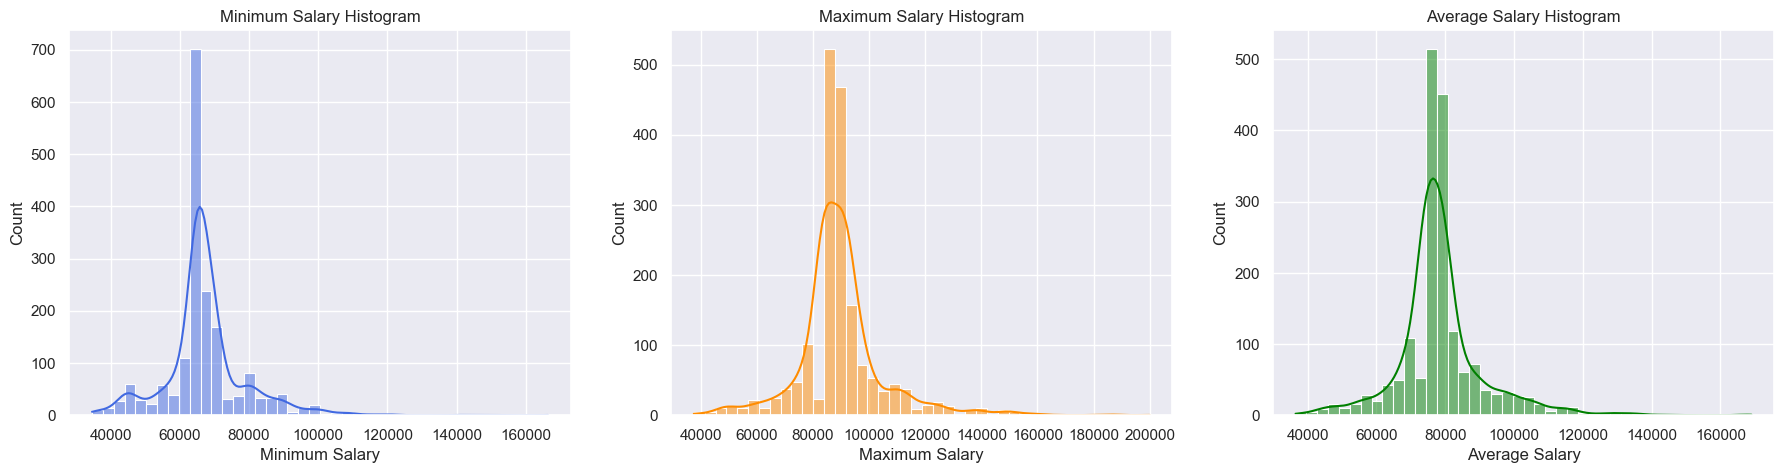

In [36]:
sns.set_theme(style='darkgrid')
plt.subplots_adjust(wspace=1, hspace=0.3)
plt.figure(figsize=[22, 5])


plt.subplot(1, 3, 1)
sns.histplot(data=df,
             x='min_salary',
             bins=42,
             kde=True,
             color='royalblue')
plt.title('Minimum Salary Histogram')
plt.xlabel('Minimum Salary')



plt.subplot(1, 3, 2)
sns.histplot(data=df,
             x='max_salary',
             bins=42,
             kde=True,
             color='darkorange')
plt.title('Maximum Salary Histogram')
plt.xlabel('Maximum Salary')



plt.subplot(1, 3, 3)
sns.histplot(data=df,
             x='avg_salary',
             bins=42,
             kde=True,
             color='green')
plt.title('Average Salary Histogram')
plt.xlabel('Average Salary')

[Back to Table of Contents](#back)

### Which data science job positions are available and most in-demand? What salary amount can we expect from these positions?

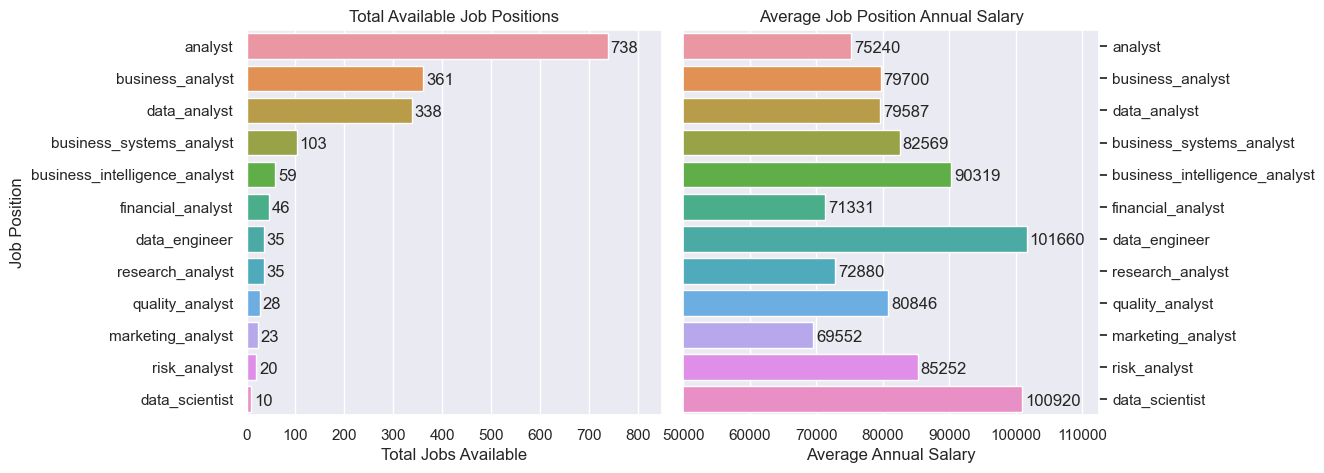

In [37]:
plt.figure(figsize=[11, 5])
plt.subplots_adjust(wspace=0.05)

plt.subplot(1, 2, 1)
total_jobs = sns.countplot(data=df,
                           y='job_title',
                           order=df['job_title'].value_counts().index)

for rect in total_jobs.patches:
    y_value = rect.get_y() + (rect.get_height() + 0.2) / 2
    x_value = rect.get_width()
    label = '{:.0f}'.format(x_value)
    total_jobs.annotate(label,
                        (x_value, y_value),
                        xytext=(2, 1),
                        textcoords='offset points',
                        ha='left',
                        va='center')
    
plt.title('Total Available Job Positions')
plt.xlabel('Total Jobs Available')
plt.xlim([0,850])
plt.ylabel('Job Position')



plt.subplot(1, 2, 2)
job_salary = sns.barplot(data=df,
                         x='avg_salary',
                         y='job_title',
                         order = df['job_title'].value_counts().index,
                         errorbar=None)

for rect in job_salary.patches:
    y_value = rect.get_y() + (rect.get_height() + 0.2) / 2
    x_value = rect.get_width()
    label = '{:.0f}'.format(x_value)
    job_salary.annotate(label,
                        (x_value, y_value),
                        xytext=(2, 1),
                        textcoords='offset points',
                        ha='left',
                        va='center')
    
plt.title('Average Job Position Annual Salary')
plt.xlabel('Average Annual Salary')
plt.xlim([50000, 112500])
plt.ylabel('')
plt.tick_params(axis='y',
                left=False,
                right=True,
                labelleft=False,
                labelright=True)

[Back to Table of Contents](#back)

### Does work experience affect job availability? What salary amount should be expected based on work experience?

Text(0, 0.5, 'Average Annual Salary')

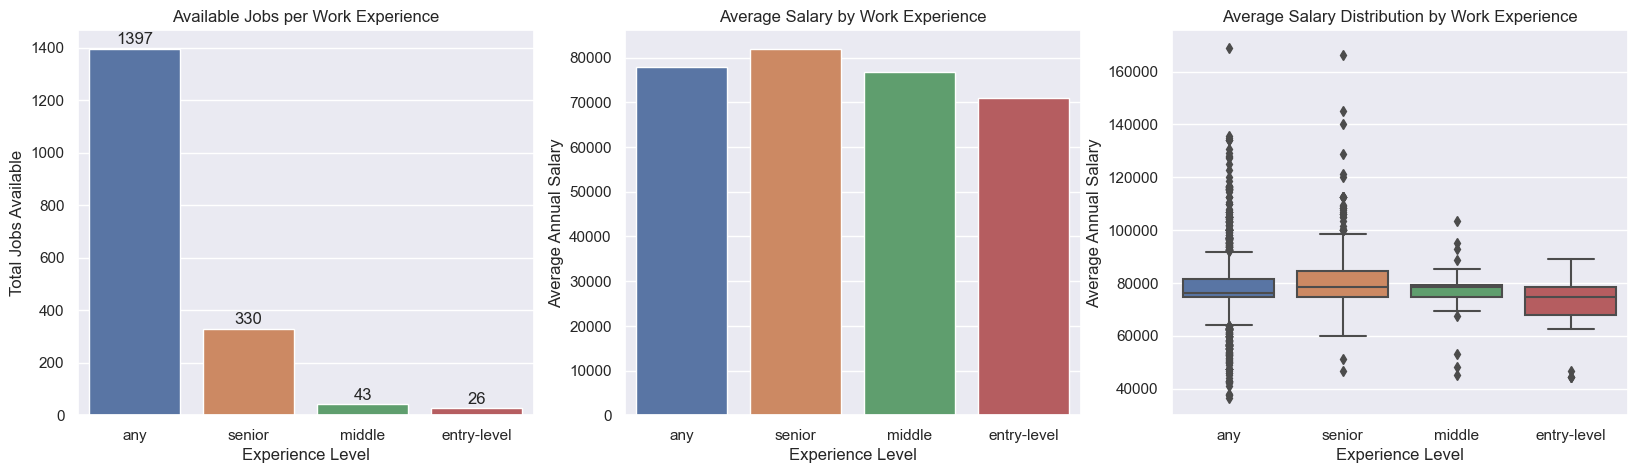

In [38]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 3, 1)
exp_count = sns.countplot(data=df,
                          x='experience_level',
                          order = df['experience_level'].value_counts().index)

for total in exp_count.patches:
    y_value = total.get_height()
    x_value = total.get_x() + total.get_width() / 2
    label = '{:.0f}'.format(y_value)
    exp_count.annotate(label,
                       (x_value, y_value),
                       xytext=(0, 1),
                       textcoords='offset points',
                       ha='center',
                       va='bottom')
    
plt.title('Available Jobs per Work Experience')
plt.xlabel('Experience Level')
plt.ylabel('Total Jobs Available')



plt.subplot(1, 3, 2)
exp_avg_salary = sns.barplot(data=df,
                             x='experience_level',
                             y='avg_salary',
                             order = df['experience_level'].value_counts().index,
                             errorbar=None)
plt.title('Average Salary by Work Experience')
plt.xlabel('Experience Level')
plt.ylabel('Average Annual Salary')



plt.subplot(1, 3, 3)
exp_box = sns.boxplot(data=df,
                      x='experience_level',
                      y='avg_salary',
                      order = df['experience_level'].value_counts().index)

plt.title('Average Salary Distribution by Work Experience')
plt.xlabel('Experience Level')
plt.ylabel('Average Annual Salary')

[Back to Table of Contents](#back)

### Which job board platform is the optimal platform when looking for a job? 

Text(0, 0.5, 'Web Platform')

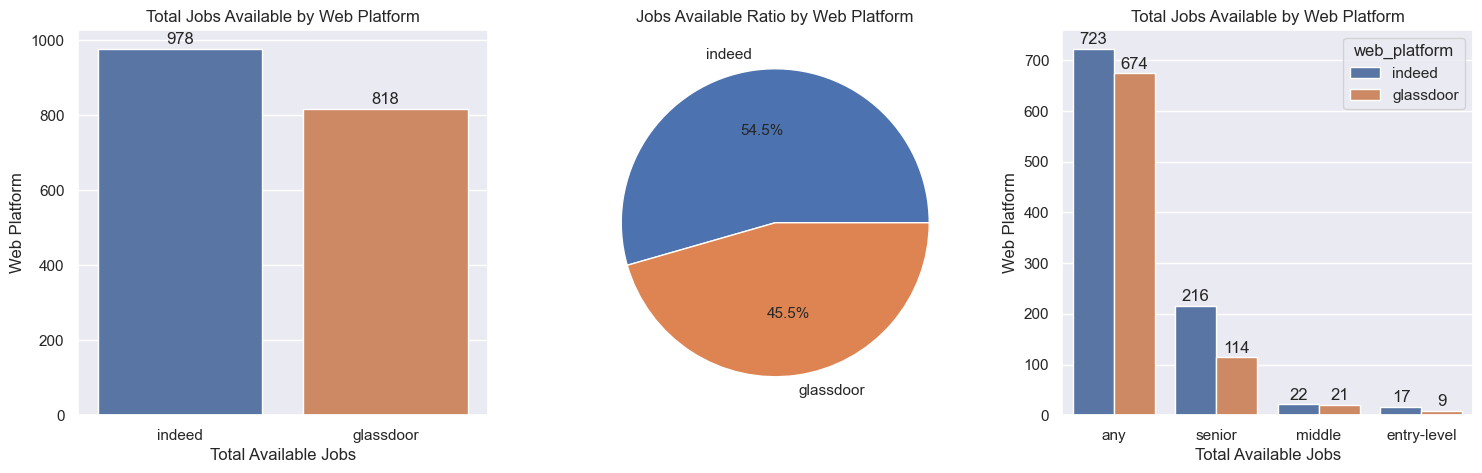

In [39]:
plt.figure(figsize=[18, 5])

plt.subplot(1, 3, 1)
web_total = sns.countplot(data=df,
                          x='web_platform')

for total in web_total.patches:
    y_value = total.get_height()
    x_value = total.get_x() + total.get_width() / 2
    label = '{:.0f}'.format(y_value)
    web_total.annotate(label,
                       (x_value, y_value),
                       xytext=(0, 1),
                       textcoords='offset points',
                       ha='center',
                       va='bottom')
    
plt.title('Total Jobs Available by Web Platform')
plt.xlabel('Total Available Jobs')
plt.ylabel('Web Platform')
    


plt.subplot(1, 3, 2)
df['web_platform'].value_counts().plot(kind='pie',
                                       fontsize=11,
                                       autopct='%1.1f%%',
                                       subplots=True)
plt.title('Jobs Available Ratio by Web Platform')
plt.ylabel(None)



plt.subplot(1, 3, 3)
exp_total = sns.countplot(data=df,
                          x='experience_level',
                          hue='web_platform')

for total in exp_total.patches:
    y_value = total.get_height()
    x_value = total.get_x() + total.get_width() / 2
    label = '{:.0f}'.format(y_value)
    exp_total.annotate(label,
                       (x_value, y_value),
                       xytext=(0, 1),
                       textcoords='offset points',
                       ha='center',
                       va='bottom')
    
plt.title('Total Jobs Available by Web Platform')
plt.xlabel('Total Available Jobs')
plt.ylabel('Web Platform')

[Back to Table of Contents](#back)

### In data science, what are the most in-demand technical skills by employers?

In [40]:
new_skill = df['tech_skills'].str.split(',_', n=17, expand=True)

df['skill_1'] = new_skill[0]
df['skill_2'] = new_skill[1]
df['skill_3'] = new_skill[2]
df['skill_4'] = new_skill[3]
df['skill_5'] = new_skill[4]
df['skill_6'] = new_skill[5]
df['skill_7'] = new_skill[6]
df['skill_8'] = new_skill[7]
df['skill_9'] = new_skill[8]
df['skill_10'] = new_skill[9]
df['skill_11'] = new_skill[10]
df['skill_12'] = new_skill[11]
df['skill_13'] = new_skill[12]
df['skill_14'] = new_skill[13]
df['skill_15'] = new_skill[14]
df['skill_16'] = new_skill[15]
df['skill_17'] = new_skill[16]
df['skill_18'] = new_skill[17]

total_skills = df[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6',
                   'skill_7', 'skill_8', 'skill_9', 'skill_10', 'skill_11', 'skill_12',
                   'skill_13', 'skill_14', 'skill_15', 'skill_16', 'skill_17', 'skill_18']]

total_skills = total_skills.stack().tolist()
total_skills = [i for i in total_skills if i != 'unknown']
skill_counter = Counter(total_skills)

skill_df = pd.DataFrame.from_dict(skill_counter, orient='index', columns=['count'])
skill_df.reset_index(inplace=True)
skill_df.rename(columns={'index': 'skill'}, inplace=True)

t10 = (skill_df.sort_values(by='count', ascending=False)).head(10)

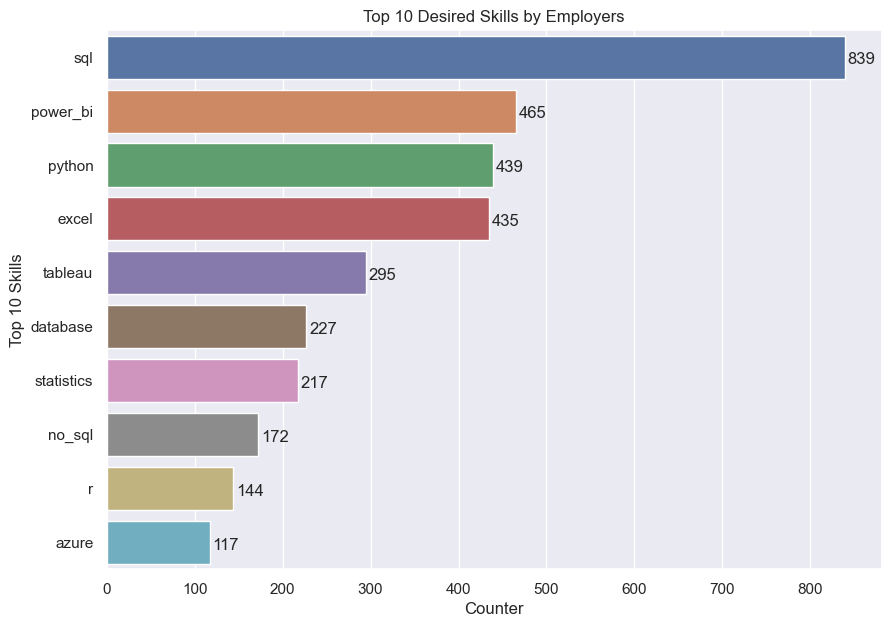

In [41]:
plt.figure(figsize=[10, 7])

top_10_skills = sns.barplot(data=t10,
                            x='count',
                            y='skill')

for rect in top_10_skills.patches:
    y_value = rect.get_y() + (rect.get_height() + 0.15) / 2
    x_value = rect.get_width()
    label = '{:.0f}'.format(x_value)
    top_10_skills.annotate(label,
                        (x_value, y_value),
                        xytext=(2, 1),
                        textcoords='offset points',
                        ha='left',
                        va='center')
    
plt.title('Top 10 Desired Skills by Employers')
plt.ylabel('Top 10 Skills')
plt.xlabel('Counter')

plt.show()

[Back to Table of Contents](#back)

### Which Canadian cities are the most in demand for on-site office personnel? How many total jobs are offered in each city?

In [42]:
top_20_cities_nonremote = df[df['city'] != 'remote'].agg({'city': 'value_counts'}).head(20).to_dict()
top_20_cities_count = pd.DataFrame.from_dict(top_20_cities_nonremote)
top_20_cities_count.reset_index(inplace=True)
top_20_cities_count.rename(columns={'index': 'city', 'city': 'count'}, inplace=True)
top_20_cities = top_20_cities_count.sort_values(by='count', ascending=False)
top_20_cities

,city,count
15,toronto,446
9,mississauga,117
16,vancouver,114
10,montreal,104
2,calgary,101
3,edmonton,60
8,markham,49
12,ottawa,48
0,brampton,38
13,richmond,30


In [43]:
top_20_list = top_20_cities['city'].tolist()

median_salary = df[df['city'].isin(top_20_list)].groupby('city')['avg_salary'].median().to_dict()
top_20_median_salary = pd.DataFrame.from_dict(median_salary, orient='index')
top_20_median_salary.reset_index(inplace=True)
top_20_median_salary.rename(columns={'index': 'city', 0: 'median_salary'}, inplace=True)
top_20_median_salary['median_salary'] = top_20_median_salary['median_salary'].astype('int')
top_20_median_salary

,city,median_salary
0,brampton,74500
1,burnaby,79500
2,calgary,78500
3,edmonton,77417
4,etobicoke,74500
5,halifax,74500
6,hamilton,74500
7,london,74500
8,markham,78500
9,mississauga,78000


In [44]:
canada_cities = pd.merge(top_20_cities, top_20_median_salary, how='right', on='city')

canada_cities['city'] = canada_cities['city'].str.replace('_', ' ')
canada_cities['city'] = canada_cities['city'].str.title()
canada_cities['count'] = (canada_cities['count'].astype('str')) + ' Jobs Available'
canada_cities['median_salary'] = 'Median Salary: ' + canada_cities['median_salary'].astype('str')
canada_cities['city_country'] = (canada_cities['city'] + ', Canada')
canada_cities['location_lat'] = ''
canada_cities['location_long'] = ''
canada_cities

,city,count,median_salary,city_country,location_lat,location_long
0,Brampton,38 Jobs Available,Median Salary: 74500,"Brampton, Canada",,
1,Burnaby,19 Jobs Available,Median Salary: 79500,"Burnaby, Canada",,
2,Calgary,101 Jobs Available,Median Salary: 78500,"Calgary, Canada",,
3,Edmonton,60 Jobs Available,Median Salary: 77417,"Edmonton, Canada",,
4,Etobicoke,15 Jobs Available,Median Salary: 74500,"Etobicoke, Canada",,
5,Halifax,20 Jobs Available,Median Salary: 74500,"Halifax, Canada",,
6,Hamilton,14 Jobs Available,Median Salary: 74500,"Hamilton, Canada",,
7,London,22 Jobs Available,Median Salary: 74500,"London, Canada",,
8,Markham,49 Jobs Available,Median Salary: 78500,"Markham, Canada",,
9,Mississauga,117 Jobs Available,Median Salary: 78000,"Mississauga, Canada",,


In [45]:
geolocator = Nominatim(user_agent='myApp')

for i in canada_cities.index:
    try:
        # GeoPy retrieving address from
        location = geolocator.geocode(canada_cities['city_country'][i])
        
        # Appending lat/long values to column using dataframe location
        canada_cities.loc[i,'location_lat'] = location.latitude
        canada_cities.loc[i,'location_long'] = location.longitude

    except:
        # Exception for the locations where no value is retrieved and 
        # appends null value to column
        canada_cities.loc[i,'location_lat'] = ''
        canada_cities.loc[i,'location_long'] = ''

canada_cities

,city,count,median_salary,city_country,location_lat,location_long
0,Brampton,38 Jobs Available,Median Salary: 74500,"Brampton, Canada",43.685832,-79.759937
1,Burnaby,19 Jobs Available,Median Salary: 79500,"Burnaby, Canada",49.24338,-122.972545
2,Calgary,101 Jobs Available,Median Salary: 78500,"Calgary, Canada",51.045606,-114.057541
3,Edmonton,60 Jobs Available,Median Salary: 77417,"Edmonton, Canada",53.546205,-113.491241
4,Etobicoke,15 Jobs Available,Median Salary: 74500,"Etobicoke, Canada",43.643556,-79.565633
5,Halifax,20 Jobs Available,Median Salary: 74500,"Halifax, Canada",44.648618,-63.585949
6,Hamilton,14 Jobs Available,Median Salary: 74500,"Hamilton, Canada",43.25608,-79.872858
7,London,22 Jobs Available,Median Salary: 74500,"London, Canada",42.983241,-81.243372
8,Markham,49 Jobs Available,Median Salary: 78500,"Markham, Canada",43.856371,-79.337682
9,Mississauga,117 Jobs Available,Median Salary: 78000,"Mississauga, Canada",43.589623,-79.644388


In [46]:
# Create a map centered on Canada
canada_map = folium.Map(location=[55.1304, -95.3468],
                        zoom_start=5,
                        tiles='OpenStreetMap',
                        font_size=15)

# Converting DataFrame to list for loop
canada_cities = canada_cities.values.tolist()

# Loop to create map markers and circle markers
for col in canada_cities:
    folium.Marker(location=[col[4], col[5]],
                  tooltip=[col[1], col[2]],
                  popup=col[0],
                  icon=folium.Icon(color='red',
                                    icon='info-sign')).add_to(canada_map)
    
    folium.CircleMarker(location=[col[4], col[5]],
                        radius=10,
                        popup=col[0],
                        color='red',
                        fill=True,
                        fill_color='red').add_to(canada_map)
    
canada_map.save('canada_map.html')
canada_map

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

Aman Bhattarai. (2024, August). Data Analyst Job Roles in Canada, Version 1. Retrieved Sep 1, 2024 from [Kaggle](https://www.kaggle.com/datasets/amanbhattarai695/data-analyst-job-roles-in-canada).

[Back to Table of Contents](#back)